In [ ]:
# Imports and Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
from pprint import pprint
import pandas as pd

df = pd.read_csv("CleanedData2.csv")
for col in df.columns:
  print(col)

Unnamed: 0
id
enumerator
canton
parroquia
communidad
household
date
starttime
locatehouse
gps
latitude
longitude
participation
population
elderly
child
adult
farmWorker
males
females
Literacy
SchoolLevel
SchoolYears
ExteriorWallMaterial
FloorMaterial
RoofMaterial
WaterSource
bicycle
motorcycle
car
phone
radio
television
computer
washer
NumPlots
sqMeters
sqMetersPlot
FlatLand
UndulatingLand
SteepLand
Irrigation
Pastos
Papas
Habas
Avena
Maiz
Hortalizas
Frijoles
Arvejas
Frutales
Barbecho
UsesRotation
noConventionalTill
Other
Dairy.Cows
Vaconas
Bulls
Calfs
Horses.Donkeys
Llamas.Alpacas
Chickens
Ducks
Sheep
Pigs
Guinea.Pigs
Goats
equipment
tractor
bombaMochila
bombaMotor
bombaEstacionaria
ordenadora
reservorio
invernadero
heardOf
nameComponents
erosionPresent
reducesYield
erosionWorsened
labranzaMinima
labranzaReducida
coberturaVegetal
curvasNivel
franjas
barrerasVivas
rotacion
zanjas
intendCoverCrops
intendSoilTillage
intendRotation
intendDitches
profitable
neighbors
moreCostly
maintainYie

In [ ]:
vars = ["population",
        "elderly",
        "child",
        "adult",
        "farmWorker",
        "males",
        "females",
        "Literacy",
        "SchoolLevel",
        "SchoolYears",
        "ExteriorWallMaterial",
        "FloorMaterial",
        "RoofMaterial",
        "WaterSource",
        "bicycle",
        "motorcycle",
        "car",
        "phone",
        "radio",
        "television",
        "computer",
        "washer",
        "NumPlots",
        "sqMeters",
        "sqMetersPlot",
        "FlatLand",
        "UndulatingLand",
        "SteepLand",
        "Irrigation",
        "UsesRotation",
        "noConventionalTill",
        "tractor",
        "bombaMochila",
        "bombaMotor",
        "bombaEstacionaria",
        "ordenadora",
        "reservorio",
        "invernadero",
        "erosionPresent",
        "reducesYield",
        "erosionWorsened",
        "labranzaMinima",
        "labranzaReducida",
        "coberturaVegetal",
        "curvasNivel",
        "franjas",
        "barrerasVivas",
        "rotacion",
        "zanjas",
        "intendCoverCrops",
        "intendSoilTillage",
        "intendRotation",
        "intendDitches",
        "profitable",
        "neighbors",
        "moreCostly",
        "maintainYield",
        "reduceLabor",
        "improveSoil",
        "reduceLoss",
        "firstYear",
        "tenYears",
        "ProbCA_Comm",
        "ProbCA_Fam",
        "ProbCA_Ext",
        "ProbCA_farm",
        "skills",
        "suitability",
        "barriers",
        "personalDecision",
        "HoHDecision",
        "yield",
        "loss",
        "drought",
        "exposedGround",
        "externalities", "wealth", "TLU"]

X = df.loc[:,vars]
X.head()
Y = df.loc[:,["Taller","FieldDay","Bulletin","Video"]]
Y.head()
Y['HighParticipation'] = 0
Y['Participation'] = Y['Taller'] + Y['FieldDay']
Y.loc[Y['Participation'] > 0, 'HighParticipation'] = 1
Y = Y['HighParticipation']
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: HighParticipation, dtype: int64

In [ ]:
# Exploratory Data Analysis
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Scaling Dataframes
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
# Re-storing them as dataframes instead of numpy arrays
X = pd.DataFrame(scaled_data, columns = X.columns)

# Displaying the new dataframes
X = X.fillna(0)
X.head()

,population,elderly,child,adult,farmWorker,males,females,Literacy,SchoolLevel,SchoolYears,...,barriers,personalDecision,HoHDecision,yield,loss,drought,exposedGround,externalities,wealth,TLU
0,0.5,0.0,0.75,0.250,0.250,0.500000,0.285714,1.0,0.666667,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.371713,0.224323
1,0.2,0.0,0.00,0.250,0.250,0.000000,0.285714,1.0,0.833333,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.303590,0.101518
2,0.5,0.0,0.50,0.375,0.375,0.666667,0.142857,1.0,0.666667,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.283286,0.038047
3,0.2,0.0,0.25,0.125,0.125,0.333333,0.000000,1.0,0.666667,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.000000,0.335665
4,0.4,0.0,0.25,0.250,0.375,0.333333,0.285714,1.0,0.666667,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.499188,0.242155


In [ ]:
# Creating Train and Test Split
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.25, random_state = 45)

Xtrain.head(8)

,population,elderly,child,adult,farmWorker,males,females,Literacy,SchoolLevel,SchoolYears,...,barriers,personalDecision,HoHDecision,yield,loss,drought,exposedGround,externalities,wealth,TLU
223,0.6,1.000000,0.00,0.375,0.625,0.500000,0.285714,1.0,0.666667,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.626755,0.838196
102,0.7,0.666667,0.00,0.625,0.875,0.166667,0.857143,1.0,0.833333,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.506369,0.000744
89,0.5,0.000000,0.75,0.250,0.250,0.500000,0.285714,1.0,0.500000,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.311625,0.042423
260,0.3,0.000000,0.25,0.250,0.250,0.166667,0.285714,1.0,0.500000,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.695684,0.083358
212,0.1,0.000000,0.00,0.125,0.125,0.166667,0.000000,1.0,0.500000,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.329419,0.071450
219,0.6,0.000000,0.75,0.250,0.375,0.666667,0.285714,1.0,0.666667,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.385544,0.011908
133,0.2,0.000000,0.00,0.250,0.250,0.166667,0.142857,1.0,0.500000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.263305,0.174338
258,1.0,0.000000,0.75,0.875,0.875,1.000000,0.571429,1.0,0.666667,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.642596,0.571301


In [ ]:
# Linear Regression Model 
from sklearn.linear_model import LinearRegression

linreg = LinearRegression() 
linreg.fit(X, Y)
print("R^2 For Training Data: %f" % (linreg.score(Xtrain, Ytrain)))
print("R^2 for Testing Data: %f " % (linreg.score(Xtest, Ytest)))

pred = linreg.predict(Xtrain)
pred[pred > 0.5] = 1
pred[pred < 0.5] = 0
accuracy = pred == Ytrain
#print(accuracy)
print("Training Accuracy: %f" % (np.sum(accuracy) / len(accuracy)))

pred = linreg.predict(Xtest)
pred[pred > 0.5] = 1
pred[pred < 0.5] = 0
accuracy = pred == Ytest
#print(accuracy)
print("Testing Accuracy: %f" % (np.sum(accuracy) / len(accuracy)))

# Calculating MSE 
from sklearn.metrics import mean_squared_error as MSE

print("MSE for Training Data: %f" % (MSE(Ytrain, linreg.predict(Xtrain))))
print("MSE for Testing Data: %f" % (MSE(Ytest, linreg.predict(Xtest))))




R^2 For Training Data: 0.376945
R^2 for Testing Data: 0.162625 
Training Accuracy: 0.821101
Testing Accuracy: 0.726027
MSE for Training Data: 0.133725
MSE for Testing Data: 0.192020


In [ ]:
import statsmodels.api as sm

sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      HighParticipation   R-squared (uncentered):                   0.781
Model:                            OLS   Adj. R-squared (uncentered):              0.700
Method:                 Least Squares   F-statistic:                              9.724
Date:                Thu, 17 Nov 2022   Prob (F-statistic):                    6.36e-40
Time:                        14:54:50   Log-Likelihood:                         -135.35
No. Observations:                 291   AIC:                                      426.7
Df Residuals:                     213   BIC:                                      713.2
Df Model:                          78                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Using Ridge Regression to Predict the Results
from sklearn.linear_model import RidgeClassifier
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV


alphas = loguniform.rvs(1e-5, 100, size = 100)
alphas = alphas.tolist()

ridge = RidgeClassifier()
ridge.fit(Xtrain, Ytrain)

hyperparameters = {"alpha":alphas,
                   "fit_intercept":[True, False],
                   "solver" : ["svd", "cholesky", "lsqr", "sag"],
                   "random_state" : [42]}


rs = RandomizedSearchCV(ridge,
                        hyperparameters,
                        scoring = "neg_mean_absolute_error")

search = rs.fit(Xtrain, Ytrain)
print(search.best_estimator_)
print(search.best_params_)
best_params = search.best_params_



RidgeClassifier(alpha=0.9700728706048537, random_state=42, solver='lsqr')
{'solver': 'lsqr', 'random_state': 42, 'fit_intercept': True, 'alpha': 0.9700728706048537}


In [ ]:
ridge = RidgeClassifier(alpha = 63,
              solver = best_params["solver"],
              fit_intercept = best_params["fit_intercept"],
              random_state = 42)

ridge.fit(Xtrain, Ytrain)
print("R^2 For Training Data: %f" % (ridge.score(Xtrain, Ytrain)))
print("R^2 for Testing Data: %f " % (ridge.score(Xtest, Ytest)))

pred = ridge.predict(Xtrain)
pred[pred > 0.5] = 1
pred[pred < 0.5] = 0
accuracy = pred == Ytrain
#print(accuracy)
print("Training Accuracy: %f" % (np.sum(accuracy) / len(accuracy)))

pred = ridge.predict(Xtest)
pred[pred > 0.5] = 1
pred[pred < 0.5] = 0
accuracy = pred == Ytest
#print(accuracy)
print("Testing Accuracy: %f" % (np.sum(accuracy) / len(accuracy)))

# Calculating MSE 
from sklearn.metrics import mean_squared_error as MSE

print("MSE for Training Data: %f" % (MSE(Ytrain, ridge.predict(Xtrain))))
print("MSE for Testing Data: %f" % (MSE(Ytest, ridge.predict(Xtest))))

R^2 For Training Data: 0.733945
R^2 for Testing Data: 0.684932 
Training Accuracy: 0.733945
Testing Accuracy: 0.684932
MSE for Training Data: 0.266055
MSE for Testing Data: 0.315068


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


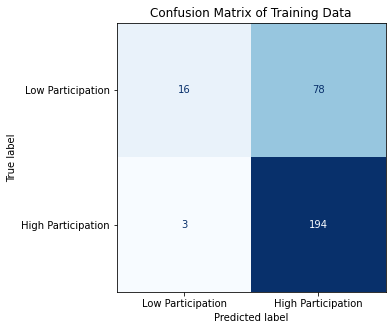

In [ ]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(1,1, figsize = (5.5, 5.5))
plot_confusion_matrix(ridge, X, Y, cmap = plt.cm.Blues,
                      display_labels = ["Low Participation", "High Participation"],
                      ax=ax,
                      colorbar = False)
plt.title("Confusion Matrix of Training Data")
plt.tight_layout()

In [ ]:
from sklearn.linear_model import LogisticRegression                                 

lr = LogisticRegression(C = 2.5)
lr.fit(X, Y)
print("Accuracy: ")
lr.score(Xtrain, Ytrain)

Accuracy: 


0.8027522935779816

In [ ]:
Ytrain.value_counts(normalize=True)

1    0.688073
0    0.311927
Name: HighParticipation, dtype: float64

In [ ]:
pred = pd.DataFrame()
pred["predictions"] = lr.predict(Xtrain)
pred["predictions"].value_counts(normalize=True)

1    0.775229
0    0.224771
Name: predictions, dtype: float64

In [ ]:
lr.score(Xtest, Ytest)

0.726027397260274

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


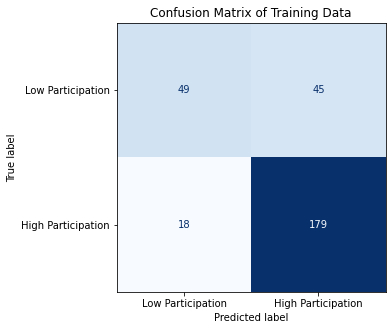

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(1,1, figsize = (5.5, 5.5))
plot_confusion_matrix(lr, X, Y, cmap = plt.cm.Blues,
                      display_labels = ["Low Participation", "High Participation"],
                      ax=ax,
                      colorbar = False)
plt.title("Confusion Matrix of Training Data")
plt.tight_layout()

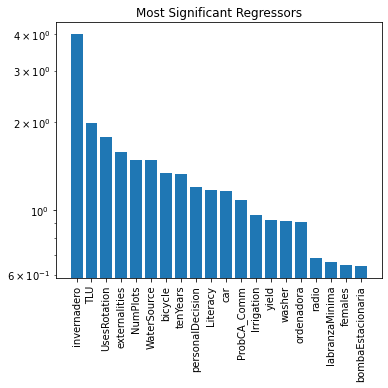

In [ ]:
import numpy as np

logit_coef = np.exp(lr.coef_[0]) - 1
idx = abs(logit_coef).argsort()[::-1]
idx = idx[0:20]
f = plt.figure(figsize = (5.5, 5.5))
plt.bar(range(len(idx)), abs(logit_coef[idx]))
_ = plt.xticks(range(len(idx)), 
               Xtrain.columns[idx], rotation = 90)
plt.yscale("log")
plt.title("Most Significant Regressors")
plt.tight_layout()

In [ ]:
# K Nearest Neighbors Optimization with GridSearch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
hyperparams = {'n_neighbors':[3,4,5,6],
               'weights' : ['uniform', 'distance'],
               'p' : [1,2]}

gs = GridSearchCV(knn,
                  hyperparams,
                  scoring = 'neg_mean_absolute_error',
                  n_jobs = -1)

search = gs.fit(Xtrain, Ytrain)
bestknn = search.best_estimator_

In [ ]:
# Fiting and Evaluating Performance
bestknn.fit(Xtrain, Ytrain)

print("R^2 For Training Data: %f" % (bestknn.score(Xtrain, Ytrain)))
print("R^2 for Testing Data: %f " % (bestknn.score(Xtest, Ytest)))

pred = bestknn.predict(Xtrain)
pred[pred > 0.5] = 1
pred[pred < 0.5] = 0
accuracy = pred == Ytrain
#print(accuracy)
print("Training Accuracy: %f" % (np.sum(accuracy) / len(accuracy)))

pred = bestknn.predict(Xtest)
pred[pred > 0.5] = 1
pred[pred < 0.5] = 0
accuracy = pred == Ytest
#print(accuracy)
print("Testing Accuracy: %f" % (np.sum(accuracy) / len(accuracy)))

# Calculating MSE 
from sklearn.metrics import mean_squared_error as MSE

print("MSE for Training Data: %f" % (MSE(Ytrain, bestknn.predict(Xtrain))))
print("MSE for Testing Data: %f" % (MSE(Ytest, bestknn.predict(Xtest))))

R^2 For Training Data: 1.000000
R^2 for Testing Data: 0.333333 
Training Accuracy: 1.000000
Testing Accuracy: 0.333333
MSE for Training Data: 0.000000
MSE for Testing Data: 0.666667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


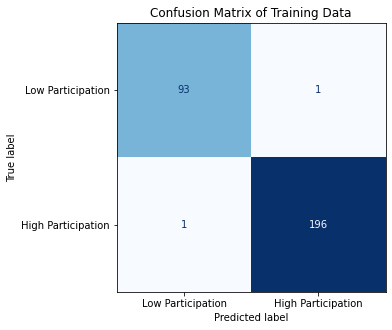

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(1,1, figsize = (5.5, 5.5))
plot_confusion_matrix(bestknn, X, Y, cmap = plt.cm.Blues,
                      display_labels = ["Low Participation", "High Participation"],
                      ax=ax,
                      colorbar = False)
plt.title("Confusion Matrix of Training Data")
plt.tight_layout()

'\nFor each attribute in the dataset, the decision tree algorithm forms a node, where the most important attribute is placed at the root node.\nFor evaluation we start at the root node and work our way down the tree by following the corresponding node that meets our condition or "decision".\nThis process continues until a leaf node is reached, which contains the prediction or the outcome of the decision tree.\n'

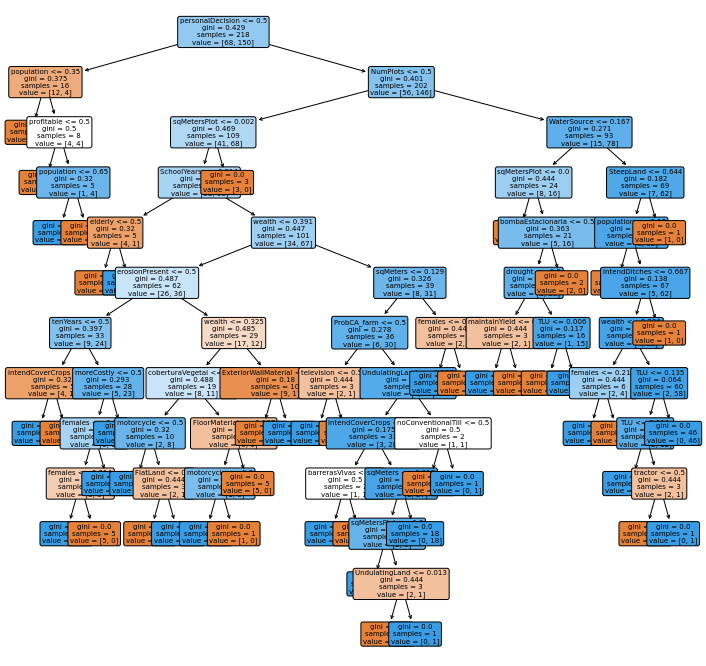

In [ ]:
import sklearn.tree
tree = sklearn.tree.DecisionTreeClassifier(max_depth=15)
tree.fit(Xtrain, Ytrain)
plt.figure(figsize=(12,12))
a = sklearn.tree.plot_tree(tree, filled=True, rounded=True, 
                           feature_names=tree.feature_names_in_,fontsize=7)
'''
For each attribute in the dataset, the decision tree algorithm forms a node, where the most important attribute is placed at the root node.
For evaluation we start at the root node and work our way down the tree by following the corresponding node that meets our condition or "decision".
This process continues until a leaf node is reached, which contains the prediction or the outcome of the decision tree.
'''